In [1]:
%matplotlib inline
import napari
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
from skimage import io
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage import exposure

**References**

1. https://towardsdatascience.com/image-segmentation-using-pythons-scikit-image-module-533a61ecc980
2. https://douglasduhaime.com/posts/simple-image-segmentation-with-scikit-image.html
3. Skimage documentation



In [2]:
def image_show(image, nrows=1, ncols=1, cmap='binary'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5, 5))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

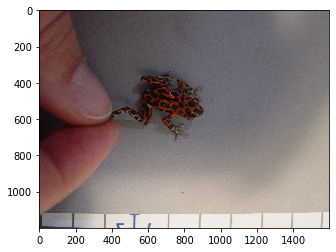

In [3]:
image = io.imread('sampleImages/CMR02.JPG')
plt.imshow(image)

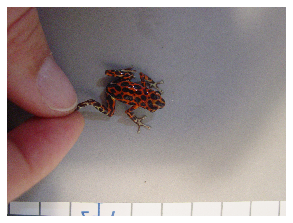

In [4]:
'''
Performs Logarithmic correction on the input image.

This function transforms the input image pixelwise according to the equation:
O = gain*log(1 + I) 
after scaling each pixel to the range 0 to 1. 
For inverse logarithmic correction, the equation is:
O = gain*(2**I - 1).
'''
gamma2=exposure.adjust_log(image)
image_show(gamma2);

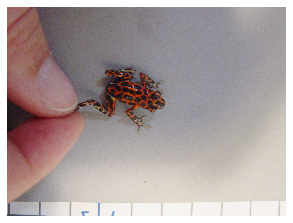

In [5]:
gamma3=exposure.adjust_log(gamma2)
image_show(gamma3);

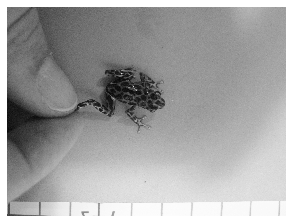

In [6]:
image_gray = color.rgb2gray(gamma3) 
image_show(image_gray);

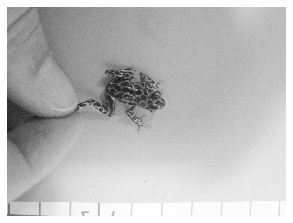

In [7]:
gamma_corrected = exposure.adjust_gamma(image_gray,.6)
image_show(gamma_corrected);

### Failed attempt of segmentation using active contour

In [8]:
def circle_points(resolution, center, radius):    
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)    
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T# Exclude last point because a closed path should not have duplicate points

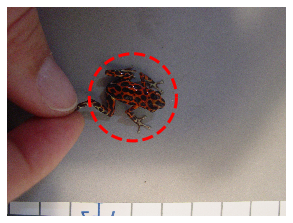

In [9]:
points = circle_points(1000, [520, 720], 250)[:-1]
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

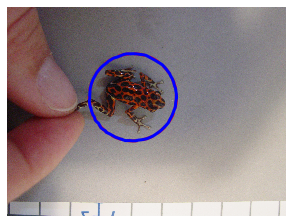

In [10]:
'''
 Higher values of alpha will make this snake contract faster.
 Beta makes the snake smoother.
''' 
snake = seg.active_contour(gamma3, points,alpha=0.15,beta=0.005)
fig, ax = image_show(gamma2)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)

### Thresholding segmentation

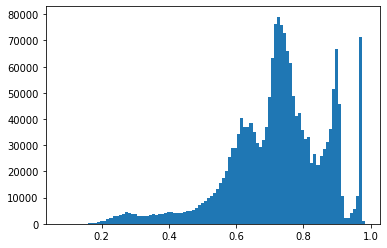

In [11]:
fig, ax = plt.subplots(1, 1)
ax.hist(gamma_corrected.ravel(),bins=100);

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x128e37e80>)

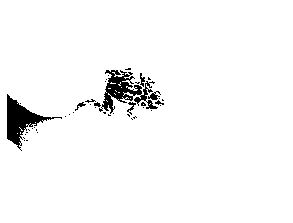

In [12]:
frog_segmented = gamma_corrected>.4
image_show(frog_segmented)

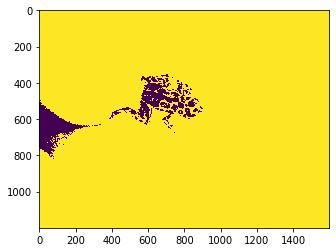

In [13]:
plt.imshow(frog_segmented)

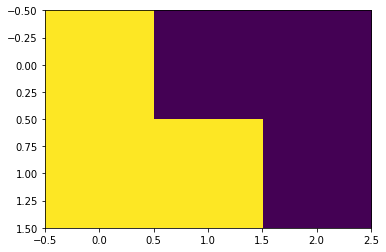

In [14]:
sample=np.array([[True,False,False],
                 [True,True,False]])
plt.imshow(sample);

### Contours

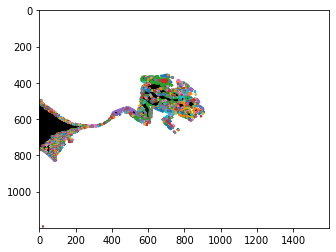

In [15]:
contours=sk.measure.find_contours(frog_segmented)
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(frog_segmented, cmap="gray")

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
plt.show()

In [16]:
'''
Cropping images
cropped_image = image[y1:y2, x1:x2]
'''
cropped=frog_segmented[350:680,400:920]

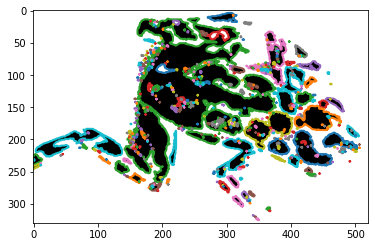

In [17]:
contours=sk.measure.find_contours(cropped)
fig, ax = plt.subplots()
ax.imshow(cropped, cmap="gray")

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
plt.show()

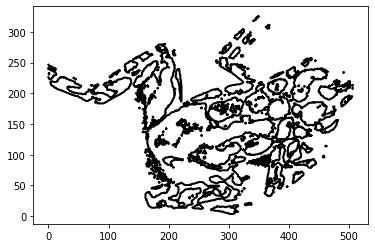

In [18]:
fig, ax = plt.subplots()
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2,color="black")

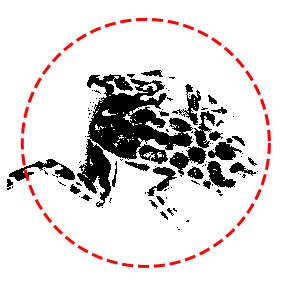

In [19]:
points = circle_points(1000, [150, 280], 250)[:-1]
fig, ax = image_show(cropped)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3);

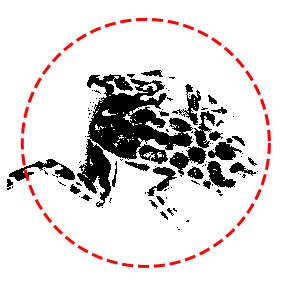

In [20]:
points = circle_points(1000, [150, 280], 250)[:-1]
fig, ax = image_show(cropped)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3);

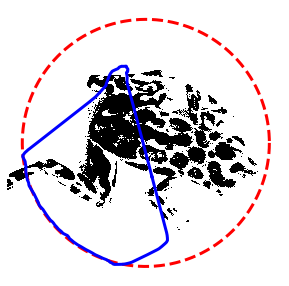

In [21]:
'''
 Higher values of alpha will make this snake contract faster.
 Beta makes the snake smoother.
''' 
snake = seg.active_contour(cropped, points,alpha=2,beta=0.5)
fig, ax = image_show(cropped)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)

### Get black proportion

In [22]:
print(type(frog_segmented))
print("elements=",frog_segmented.size, "dimensions=", frog_segmented.shape)
#One, True is white, then Zero, False is black
black=1-cropped.sum()/1920000
black

<class 'numpy.ndarray'>
elements= 1920000 dimensions= (1200, 1600)


0.9320932291666667